# Polar Workouts

Created by Aubrey (8/22/24)

In [452]:
import random
import os, glob
import pandas as pd
from datetime import datetime, timedelta
import json 
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Tip: how to install something from command line: !pip install biopython
#initialization
random.seed(1000)

## Load Polar Data from Google Drive

Read in Polar user exported data from Google Drive ~/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/polar/workout/

Num participants with manually exported polar: 26
    record_id                  participant  num_polar_user_export
0          51   051_qtz1b16917131625167555                     17
1          47   047_qtz1b11649673216856592                     28
2         100   100_qtz1b13231144819788317                     37
3          60   060_qtz1b13779232687428538                     11
4          90   090_qtz1b15741679182868673                     39
5          94   094_qtz1b15347975827571443                     34
6          89   089_qtz1b15536926332385566                     36
7          20   020_qtz1b19129928133897239                     23
8          37   037_qtz1b19851346611142986                     35
9        1000  1000_qtz1b12831179598963353                     41
10         86   086_qtz1b11984351926876373                     33
11         97   097_qtz1b15382499214278169                     33
12         75   075_qtz1b19516699726434684                     39
13         71   071_qtz1b1

<Axes: xlabel='num_polar_user_export', ylabel='Count'>

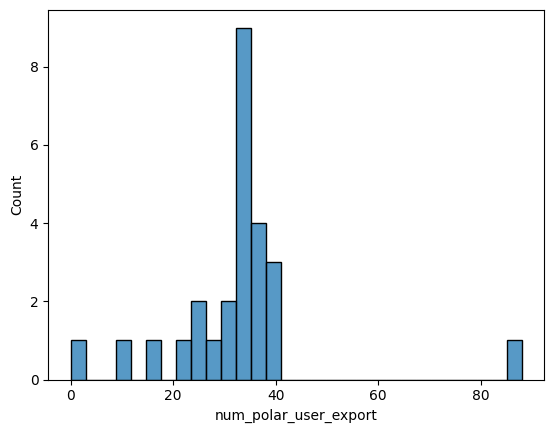

In [453]:
# Get a list of all files
polar_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/polar/workout/"
os.chdir(polar_path)
# Get a list of all folders in the directory
folders = [f for f in os.listdir() if os.path.isdir(f)]
print("Num participants with manually exported polar:", len(folders))

# Get number of polar files for each person
ppt_files = {}
all_data = pd.DataFrame()
for ppt in folders:
    ppt_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/polar/workout/{ppt}"
    os.chdir(ppt_path)
    files = [f for f in os.listdir(ppt_path) if os.path.isfile(os.path.join(ppt_path, f))]
    num_file = len(files)
    ppt_files[ppt] = files
    record_id = int(ppt.split("_")[0])
    num_df = pd.DataFrame({
                'record_id': [record_id],
                'participant': [ppt],
                'num_polar_user_export': [num_file],
                })
    all_data = pd.concat([all_data, num_df], ignore_index=True)
print(all_data)

# Plot distribution of polar files
sns.histplot(data=all_data, x="num_polar_user_export", bins=30)


# Files for each participant stored in 'ppt_files'
# ppt_files['019_qtz1b17236523485537658']

# Load REDCap Data from Google Drive
~/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/Redcap/Processed_Data/64208_Demographics_Processed.csv

In [454]:
# Load REDCap data
rc_path = "/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/Redcap/Processed_Data/64208_Demographics_Processed.csv"
rc = pd.read_csv(rc_path)
rc = pd.DataFrame(rc)
rc
#rc.head()

,record_id,myphd_id,enrollment_status,sex,race,ethnicity,age,agegroup,Group,current_week,...,bl_heart_rate_mict,control_crossover,crossover_rand_group,total_workouts_in_REDCap,quality_workouts_in_REDCap,number_polar_used,number_fitbit_used,quality_fraction,training_status,percent_complete_of_36_wkts
0,1,NaN,Screen failed,Male,Asian Indian,"No, not of Hispanic, Latino, or Spanish origin",46.0,35-65 yrs,New Participant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,Screen failed,Female,Mixed race,"No, not of Hispanic, Latino, or Spanish origin",21.0,18-34 yrs,New Participant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,qtz1b14715581577341838,Completed,Female,Mixed race,"Yes, another Hispanic, Latino, or Spanish orig...",27.0,18-34 yrs,MICT,Completed,...,117-127,NaN,NaN,21.0,20.0,21.0,15.0,95.2,Great,55.6
3,4,qtz1b18445579426718188,Completed,Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",38.0,35-65 yrs,HIIT,Completed,...,121-132,NaN,NaN,40.0,14.0,40.0,40.0,35.0,Poor,38.9
4,5,qtz1b16767772887265127,Completed,Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",26.0,18-34 yrs,MICT,Completed,...,116-128,NaN,NaN,33.0,33.0,33.0,33.0,100.0,Great,91.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1070,NaN,Completed,Male,NaN,NaN,26.0,18-34 yrs,Control,Completed,...,NaN,Yes,Endurance,32.0,31.0,32.0,32.0,96.9,Great,86.1
119,1076,NaN,On-going Randomized,Female,White,"No, not of Hispanic, Latino, or Spanish origin",24.0,18-34 yrs,Control,Week 9,...,NaN,Yes,Endurance,23.0,21.0,22.0,22.0,91.3,Great,58.3
120,1091,NaN,On-going Randomized,Male,NaN,NaN,42.0,35-65 yrs,Control,Week 8,...,NaN,Yes,HIIT,21.0,20.0,21.0,21.0,95.2,Great,55.6
121,1103,NaN,On-going Randomized,Female,NaN,NaN,37.0,35-65 yrs,Control,Week 2,...,NaN,Yes,HIIT,3.0,0.0,3.0,3.0,0.0,Poor,0.0


# Combine datasets

In [462]:
# Merge rc and polar count dataframes
all_data = all_data.merge(rc, how='inner', on='record_id') 



Unique participants: 25


Text(0.5, 1.0, 'Num polar user exports for HIIT vs. MICT')

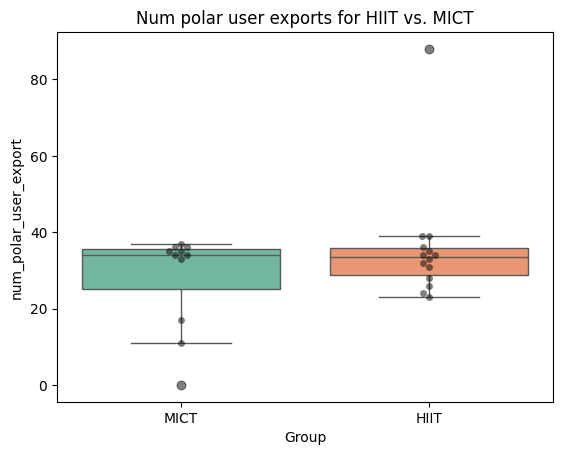

In [456]:
# Explore combined dataframe
all_data.columns
print("Unique participants:", len(all_data['record_id'].unique()))
all_data.groupby('Group')

# Boxplot of number of days per group with seaborn
ax = sns.boxplot(data=all_data, x='Group', y='num_polar_user_export', hue='Group', palette='Set2')
sns.swarmplot(data=all_data, x='Group', y='num_polar_user_export', color='black', alpha=0.5)
plt.title('Num polar user exports for HIIT vs. MICT')

In [457]:
# Compare # polar we have to # workouts they specifically reported using polar in REDCap
all_data['num_polar_user_export'] == all_data['number_polar_used']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
dtype: bool

## Randomly Sample Polar Data for Visualization

Polar export and REDCap combined into df called "all_data"

In [461]:
# Filter for ids in HIIT or MICT
HIIT_IDs = all_data[all_data['Group']=="HIIT"]['participant']
MICT_IDs = all_data[all_data['Group']=="MICT"]['participant']

#random.sample(HIIT_IDs['record_id'], k=3)
#help(random.sample)
#print(HIIT_IDs)
#print(MICT_IDs)

# Randomly sample for 3 ids in HIIT or MICT
random.seed(1)
HIIT_sample = random.sample([47, 90, 94, 20, 97, 75, 71, 19, 109, 64, 95, 36, 72, 80], 3)
MICT_sample = random.sample([51, 100, 60, 89, 37, 86, 21, 84, 77, 73, 46], 3)


# Get the 2nd entry for ppt:
all_data



# Extract their 10th file to analyze

,record_id,participant,num_polar_user_export,myphd_id,enrollment_status,sex,race,ethnicity,age,agegroup,...,bl_heart_rate_mict,control_crossover,crossover_rand_group,total_workouts_in_REDCap,quality_workouts_in_REDCap,number_polar_used,number_fitbit_used,quality_fraction,training_status,percent_complete_of_36_wkts
0,51,051_qtz1b16917131625167555,17,qtz1b16917131625167555,Completed,Female,Asian Indian,"No, not of Hispanic, Latino, or Spanish origin",30.0,18-34 yrs,...,131-142,No,NaN,34.0,33.0,34.0,34.0,97.1,Great,91.7
1,47,047_qtz1b11649673216856592,28,qtz1b11649673216856592,Completed,Female,Korean,"No, not of Hispanic, Latino, or Spanish origin",46.0,35-65 yrs,...,103-114,NaN,NaN,30.0,24.0,29.0,30.0,80.0,Great,66.7
2,100,100_qtz1b13231144819788317,37,qtz1b13231144819788317,Completed,Female,Chinese,"No, not of Hispanic, Latino, or Spanish origin",32.0,18-34 yrs,...,105-116,NaN,NaN,35.0,33.0,35.0,35.0,94.3,Great,91.7
3,60,060_qtz1b13779232687428538,11,qtz1b13779232687428538,Completed,Female,White,"No, not of Hispanic, Latino, or Spanish origin",32.0,18-34 yrs,...,113-126,NaN,NaN,32.0,24.0,30.0,33.0,75.0,Good,66.7
4,90,090_qtz1b15741679182868673,39,qtz1b15741679182868673,Completed,Male,Korean,"No, not of Hispanic, Latino, or Spanish origin",32.0,18-34 yrs,...,118-130,NaN,NaN,39.0,36.0,38.0,39.0,92.3,Great,100.0
5,94,094_qtz1b15347975827571443,34,qtz1b15347975827571443,On-going Randomized,Female,White,"No, not of Hispanic, Latino, or Spanish origin",27.0,18-34 yrs,...,121-131,NaN,NaN,35.0,31.0,35.0,34.0,88.6,Great,86.1
6,89,089_qtz1b15536926332385566,36,qtz1b15536926332385566,Completed,Male,White,"No, not of Hispanic, Latino, or Spanish origin",37.0,35-65 yrs,...,120-132,NaN,NaN,30.0,30.0,30.0,30.0,100.0,Great,83.3
7,20,020_qtz1b19129928133897239,23,qtz1b19129928133897239,Completed,Male,Asian Indian,"No, not of Hispanic, Latino, or Spanish origin",41.0,35-65 yrs,...,131-141,NaN,NaN,23.0,21.0,22.0,23.0,91.3,Great,58.3
8,37,037_qtz1b19851346611142986,35,qtz1b19851346611142986,Completed,Female,White,"No, not of Hispanic, Latino, or Spanish origin",25.0,18-34 yrs,...,119-130,NaN,NaN,35.0,34.0,35.0,35.0,97.1,Great,94.4
9,86,086_qtz1b11984351926876373,33,qtz1b11984351926876373,Completed,Female,White,"No, not of Hispanic, Latino, or Spanish origin",23.0,18-34 yrs,...,131-141,NaN,NaN,30.0,23.0,30.0,30.0,76.7,Good,63.9


094_pwo23_d062_hr_WearablePolar_Polar.csv


FileNotFoundError: [Errno 2] No such file or directory: '/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/polar/workout/094_qtz1b15347975827571443/094_pwo23_d062_hr_WearablePolar_Polar.csv'

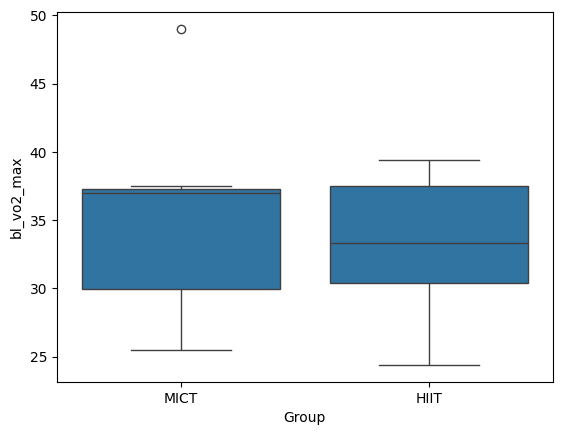

In [451]:
all_data.columns
sns.boxplot(data = all_data, x='Group', y='bl_vo2_max')

# Get participant and file of interest
print(ppt_files['094_qtz1b15347975827571443'][10])
file = '094_pwo23_d062_hr_WearablePolar_Polar.csv'
participant = '094_qtz1b15347975827571443'

for file in rand_filenames:
    polar_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/polar/workout/{participant}/094_pwo23_d062_hr_WearablePolar_Polar.csv"
    polar_path = pd.read_csv(polar_path)

In [ ]:
# From all_data, filter for ids in Control

# Randomly sample for 3 ids in Control 

# Pick their 10th recorded day of Fitbit data (use processed Fitbit csv and select 10th start date)

In [ ]:
# Make line plot with HIIT, MICT, and potentially Control?

# Load Fitbit Data from Google Drive
Read in processed Fitbit data from Google Drive (1 csv file per participant).

In [286]:
# Get a list of all files
hr_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/"

os.chdir(hr_path)
files = []
for file in glob.glob("*.csv"):
    file = file.split('_hr')[0]
    files.append(file)
    #print(files)

# Arrange by number before plotting
# Function to extract the numeric prefix if it exists
def extract_numeric_prefix(filename):
    parts = filename.split('_')
    return int(parts[0]) if parts[0].isdigit() else float('inf')

# Sort filenames by numeric prefix
sorted_filenames = sorted(files, key=extract_numeric_prefix)
sorted_filenames

['004_qtz1b18445579426718188',
 '005_qtz1b16767772887265127',
 '006_qtz1b13893369732763681',
 '007_qtz1b18472445718468562',
 '010_qtz1b19121547781291613',
 '012_qtz1b17269433695528197',
 '014_qtz1b13168362397931536',
 '018_qtz1b19261322566215748',
 '019_qtz1b17236523485537658',
 '020_qtz1b19129928133897239',
 '021_qtz1b16327775253853113',
 '026_qtz1b12285682268619722',
 '036_qtz1b18341388618579643',
 '037_qtz1b19851346611142986',
 '040_qtz1b12182259692885175',
 '045_qtz1b14361342418376156',
 '046_qtz1b12637499885254663',
 '047_qtz1b11649673216856592',
 '050_qtz1b15781646323819351',
 '051_qtz1b16917131625167555',
 '056_qtz1b12687913936119614',
 '060_qtz1b13779232687428538',
 '070_qtz1b14637549187739211',
 '071_qtz1b19649447249479579',
 '072_qtz1b19779165843537516',
 '073_qtz1b17592513599164541',
 '075_qtz1b19516699726434684',
 '077_qtz1b11121669136412997',
 '080_qtz1b19331948298967664',
 '081_qtz1b16719481142363772',
 '084_qtz1b11871696423624282',
 '086_qtz1b11984351926876373',
 '087_qt

In [289]:
for participant in sorted_filenames:
    hr_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/{participant}_hr_WearableFitbit_Fitbit.csv"
    hr_path = pd.read_csv(hr_path)
        
    # Recode enrollment status
    hr_path['enrollment_status']=hr_path['enrollment_status'].replace({4: "On-going Randomized", 5: 'Completed', 6: 'Withdrawn', 7: 'Lost to Follow-Up'})
    hr_path['randomization_group']=hr_path['randomization_group'].replace({1: "HIIT", 2: "MICT", 3: "Control"})
        
    # Get metrics for ppt
    num_days = len(hr_path['start_date'].unique())
    enroll = hr_path['enrollment_status'][1]
    ex_group = hr_path['randomization_group'][1]

In [291]:
sorted_filenames

['004_qtz1b18445579426718188',
 '005_qtz1b16767772887265127',
 '006_qtz1b13893369732763681',
 '007_qtz1b18472445718468562',
 '010_qtz1b19121547781291613',
 '012_qtz1b17269433695528197',
 '014_qtz1b13168362397931536',
 '018_qtz1b19261322566215748',
 '019_qtz1b17236523485537658',
 '020_qtz1b19129928133897239',
 '021_qtz1b16327775253853113',
 '026_qtz1b12285682268619722',
 '036_qtz1b18341388618579643',
 '037_qtz1b19851346611142986',
 '040_qtz1b12182259692885175',
 '045_qtz1b14361342418376156',
 '046_qtz1b12637499885254663',
 '047_qtz1b11649673216856592',
 '050_qtz1b15781646323819351',
 '051_qtz1b16917131625167555',
 '056_qtz1b12687913936119614',
 '060_qtz1b13779232687428538',
 '070_qtz1b14637549187739211',
 '071_qtz1b19649447249479579',
 '072_qtz1b19779165843537516',
 '073_qtz1b17592513599164541',
 '075_qtz1b19516699726434684',
 '077_qtz1b11121669136412997',
 '080_qtz1b19331948298967664',
 '081_qtz1b16719481142363772',
 '084_qtz1b11871696423624282',
 '086_qtz1b11984351926876373',
 '087_qt